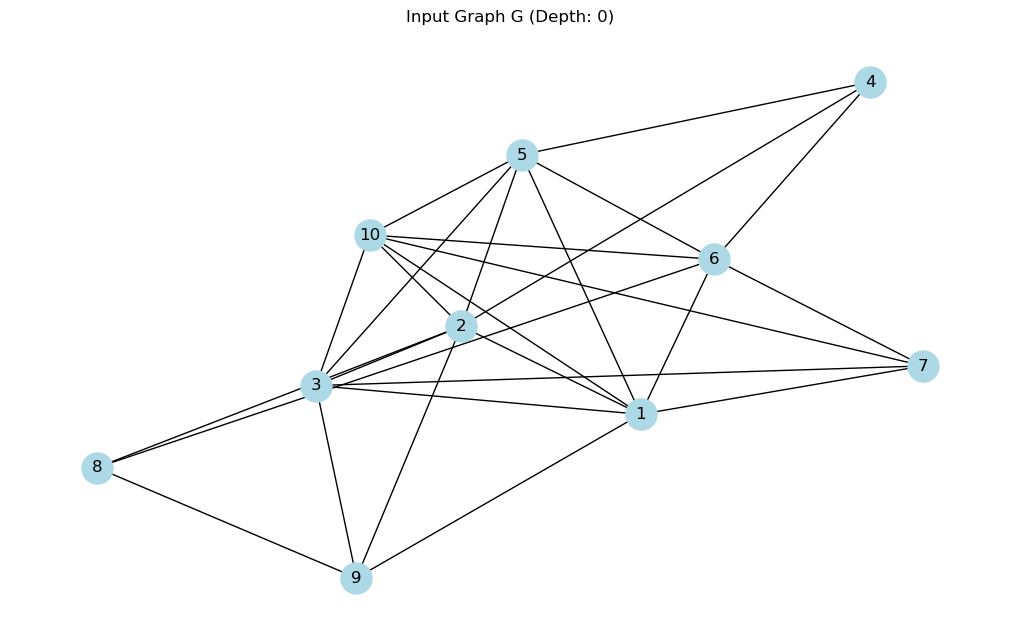

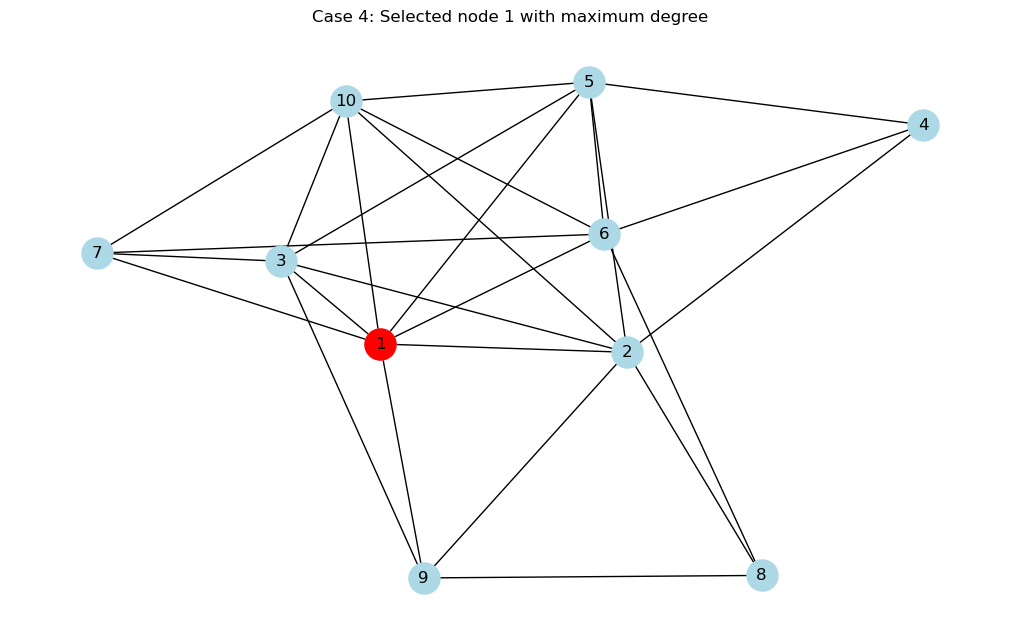

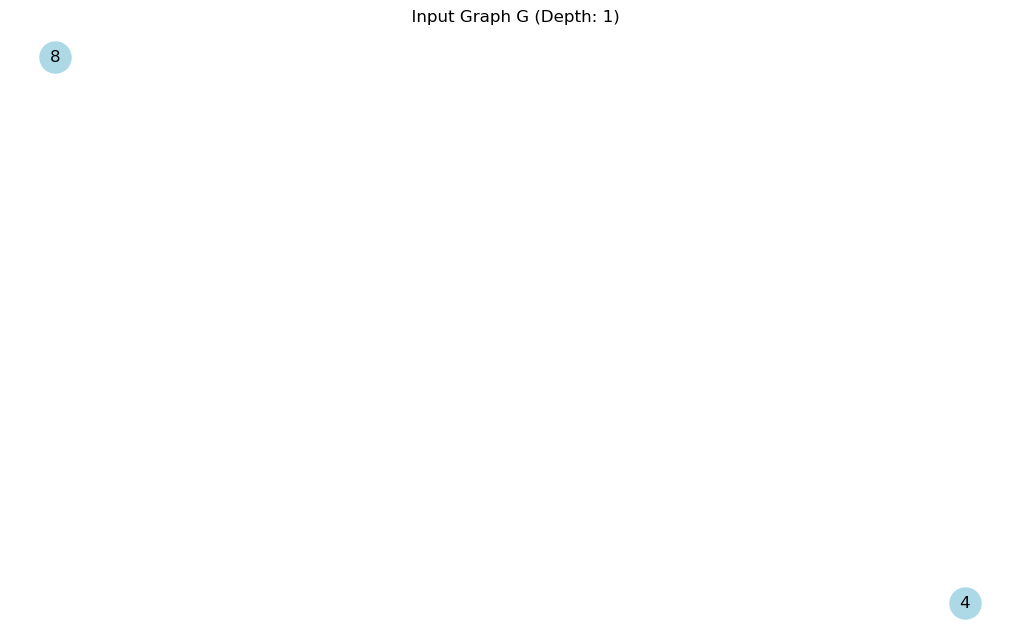

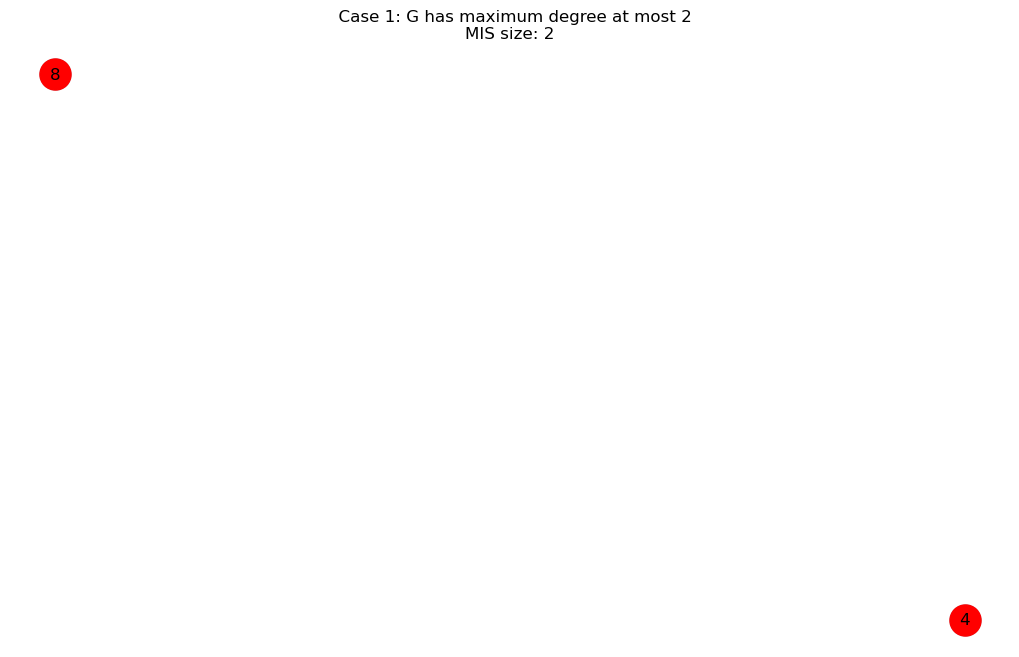

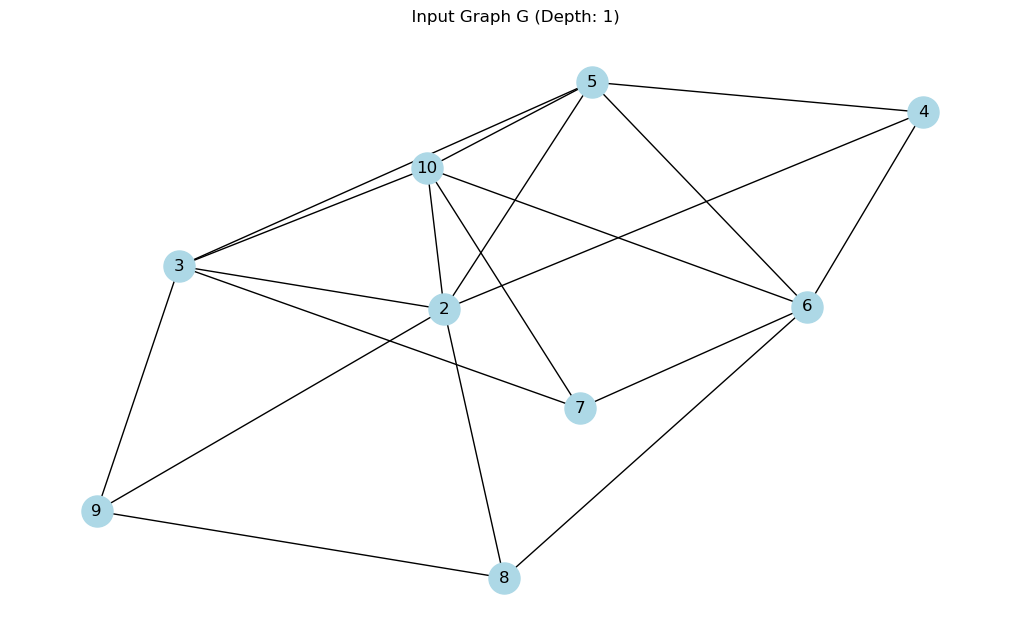

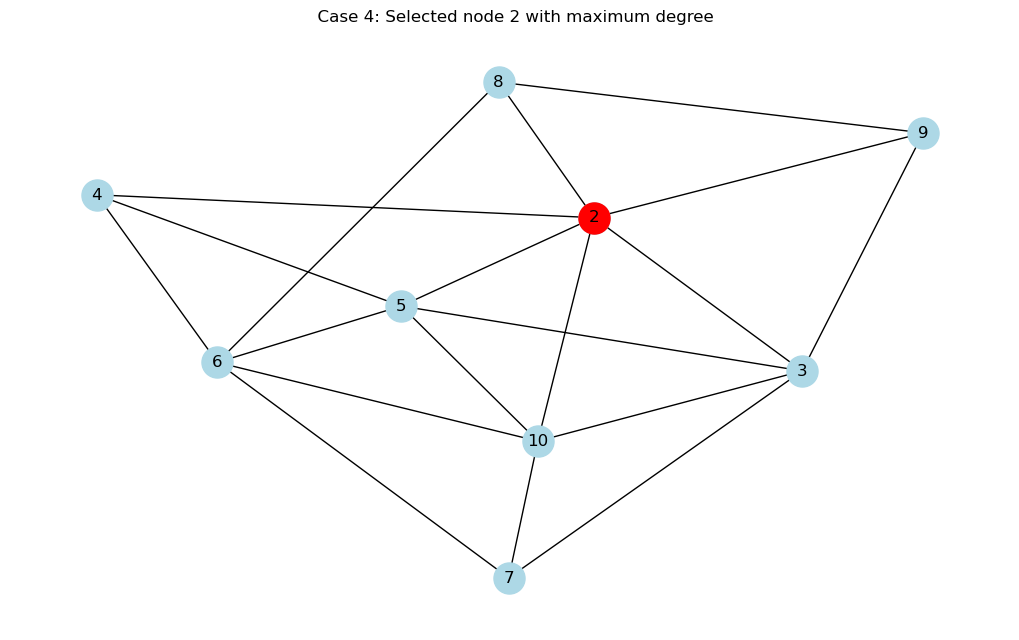

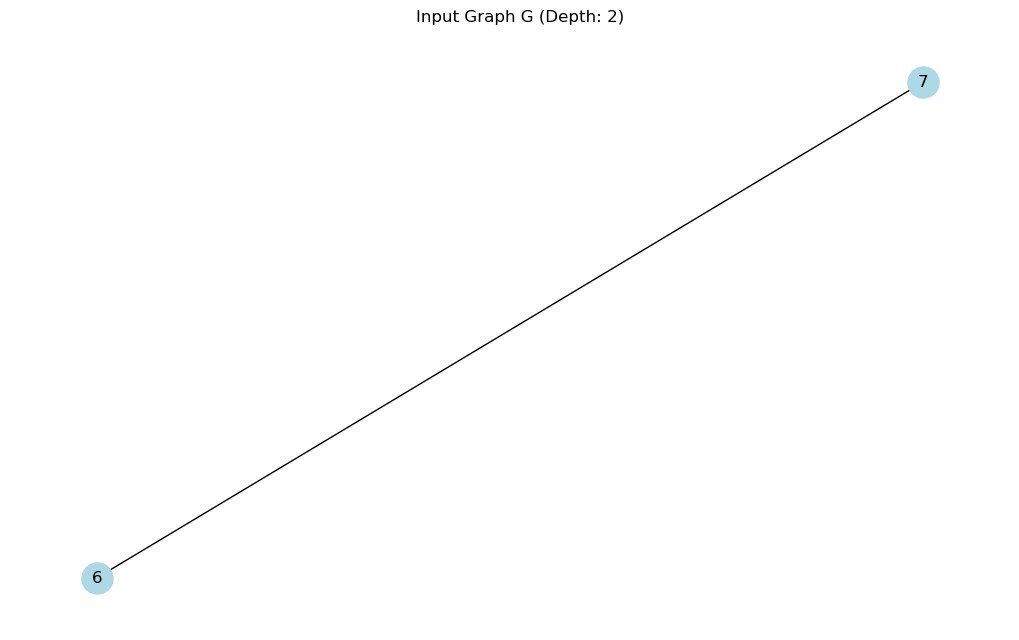

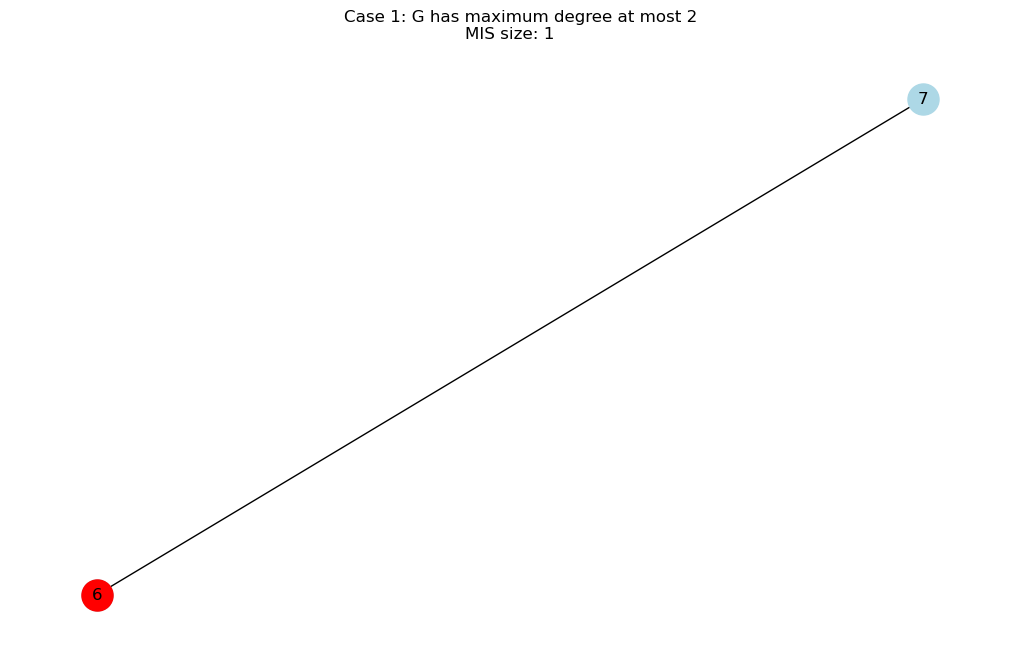

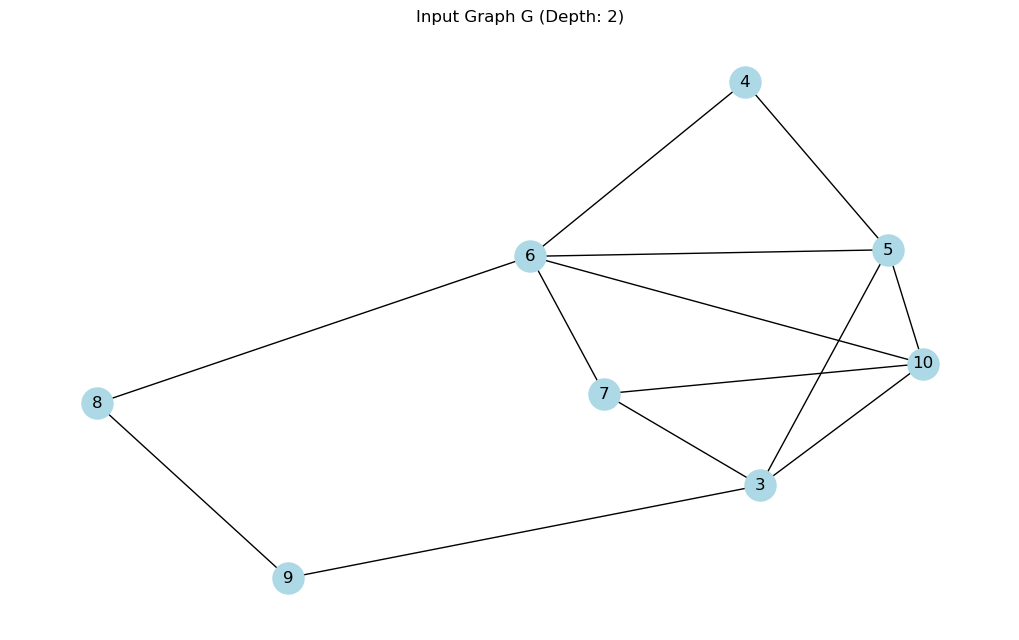

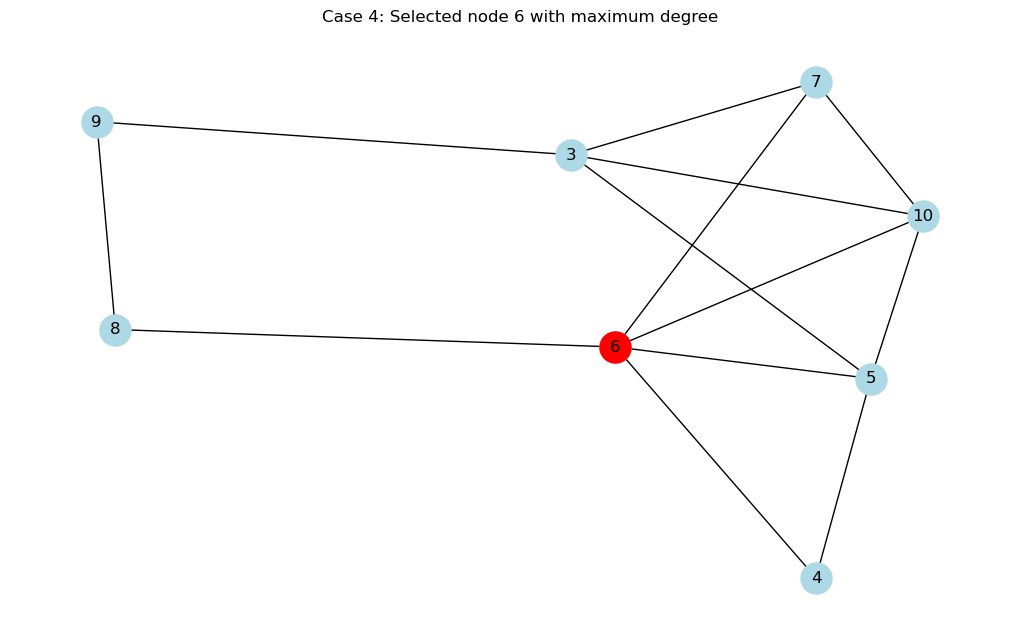

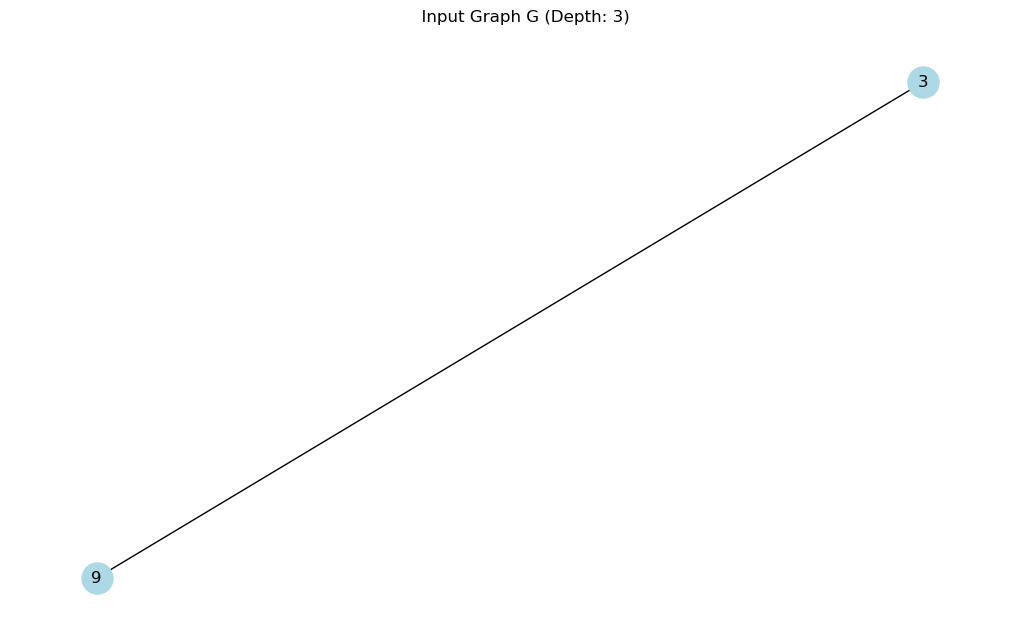

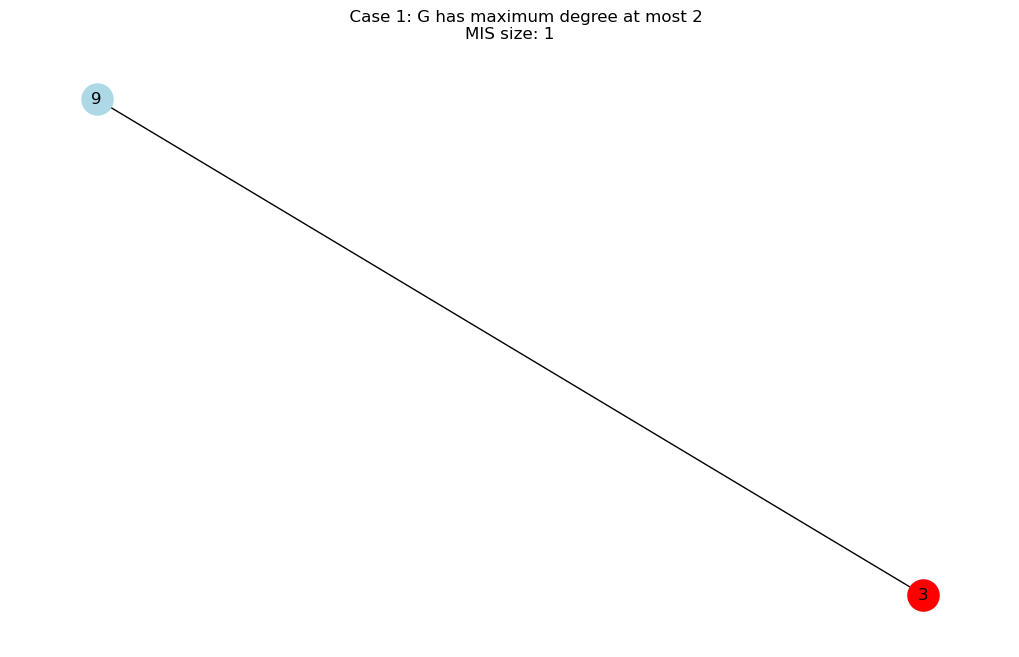

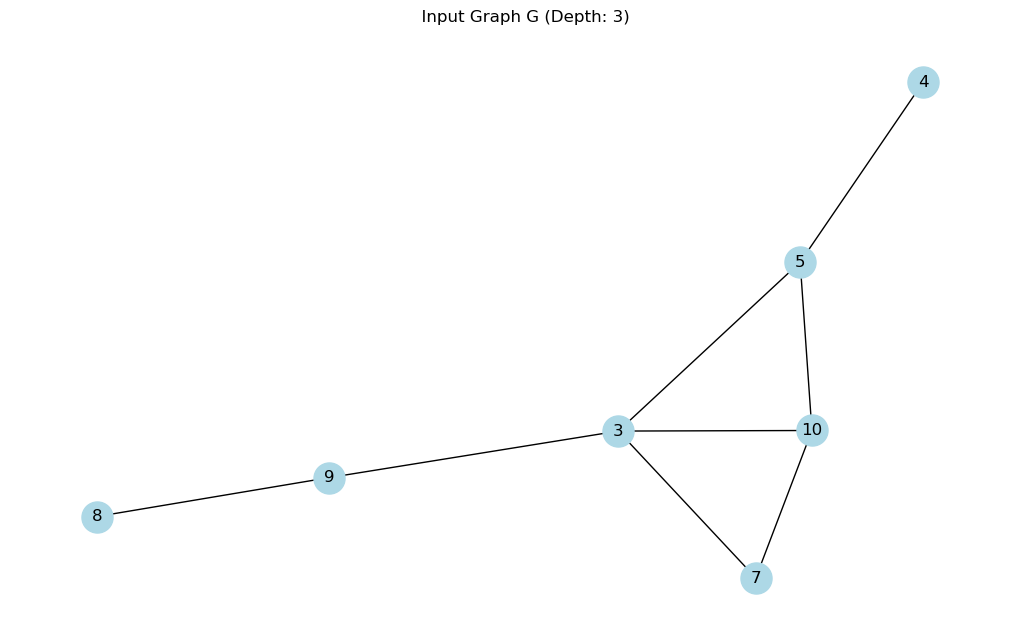

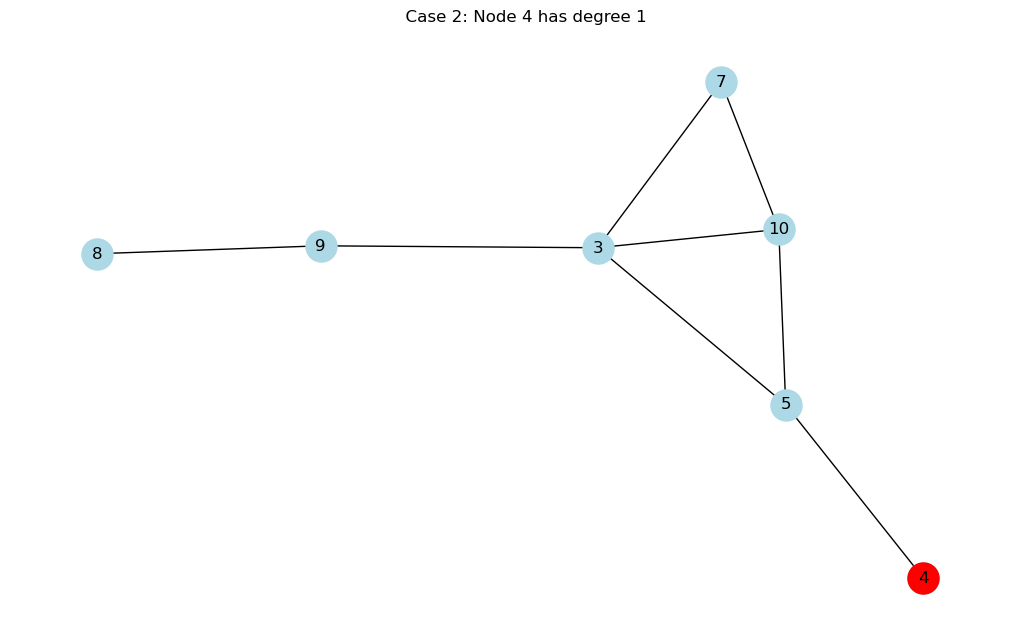

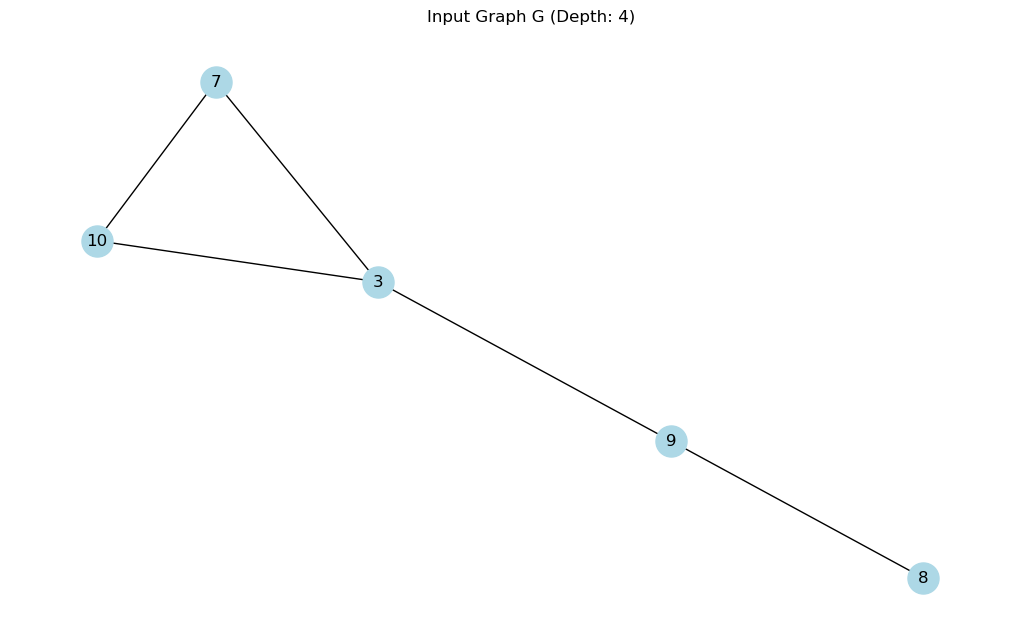

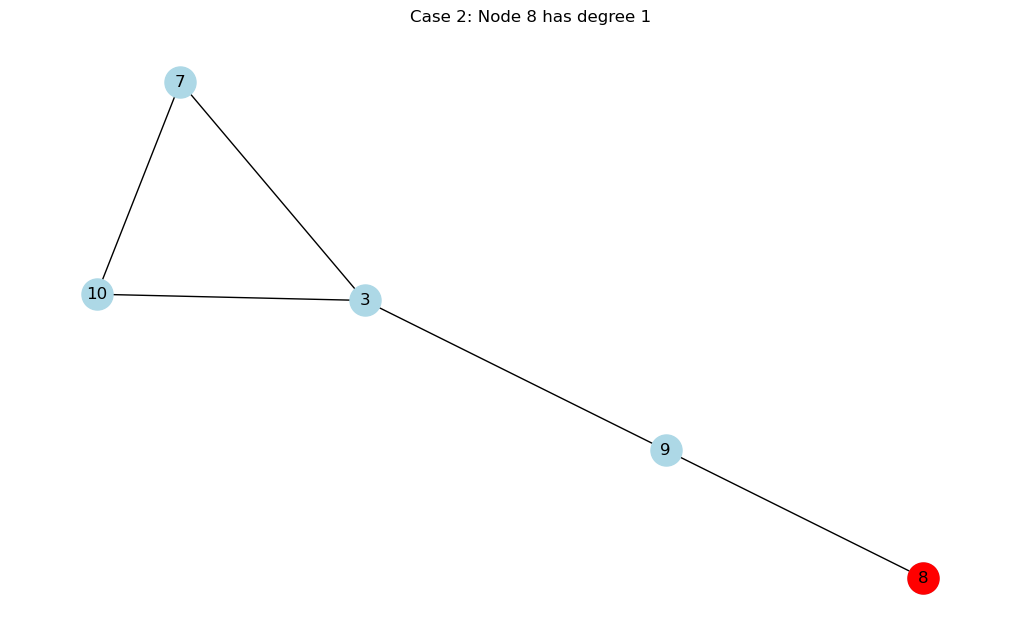

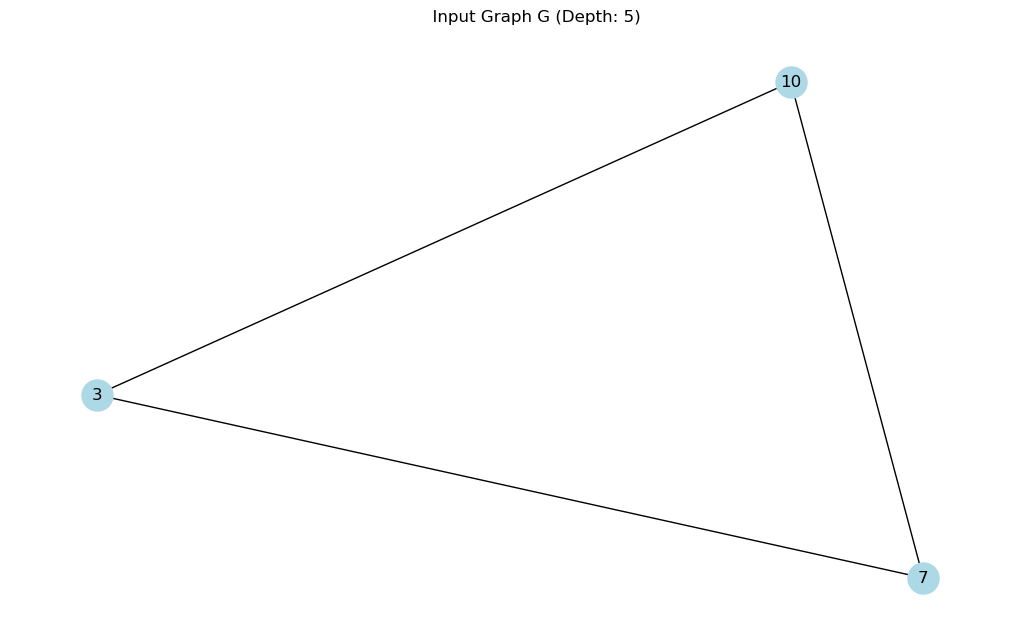

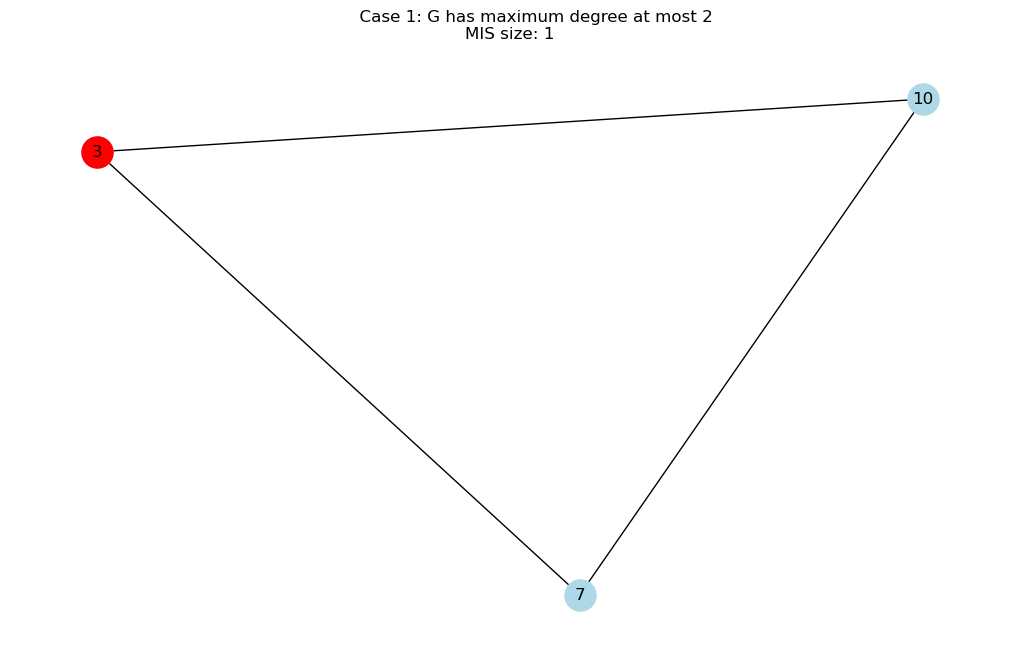

Heuristic MIS: {8, 3, 4}
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/an/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/p2/tltdzcl142g2b8gt5mll07w00000gn/T/34b9e39d78fd4160b6de6d61c7d5ad73-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/p2/tltdzcl142g2b8gt5mll07w00000gn/T/34b9e39d78fd4160b6de6d61c7d5ad73-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 31 COLUMNS
At line 114 RHS
At line 141 BOUNDS
At line 152 ENDATA
Problem MODEL has 26 rows, 10 columns and 52 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 5 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 15 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 17 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 9 strengthened rows, 0 substitutions
Cgl0003I 0 f

In [2]:
# util_usage.ipynb

# Import the utilities
from util import generate_random_graph, visualize_graph, mis, global_maximum_independent_set

# Generate a random graph
G = generate_random_graph(10, 0.5)

# User choice for visualization
visualize = True  # Set this to False if you do not want to visualize the graph

# Find the maximum independent set using the MIS heuristic method
heuristic_mis = mis(G, visualize=visualize)
print(f"Heuristic MIS: {heuristic_mis}")

# Find the maximum independent set using the global optimization method
global_mis = global_maximum_independent_set(G)
print(f"Global MIS: {global_mis}")



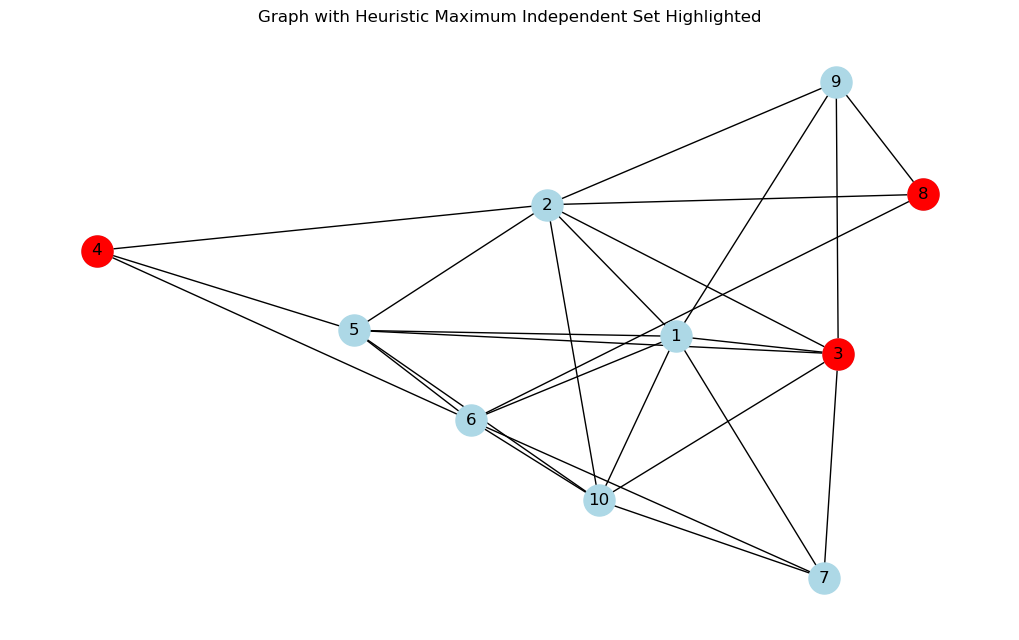

In [4]:

# Visualize the graph with the heuristic MIS highlighted if user chose to visualize
if visualize:
    visualize_graph(G, "Graph with Heuristic Maximum Independent Set Highlighted", heuristic_mis)



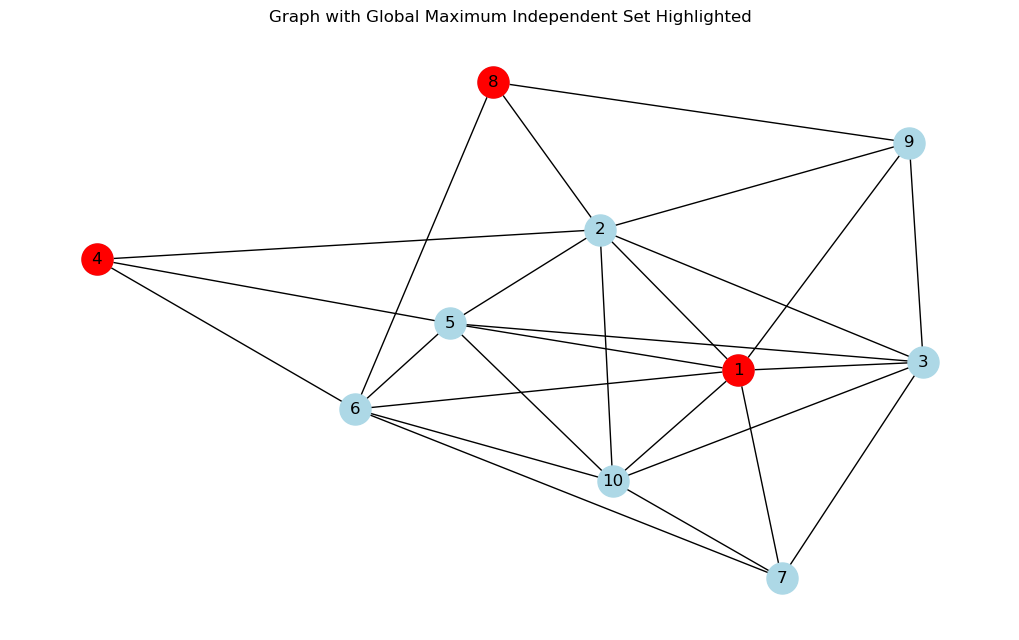

In [5]:
# Visualize the graph with the global MIS highlighted if user chose to visualize
if visualize:
    visualize_graph(G, "Graph with Global Maximum Independent Set Highlighted", global_mis)